In [1]:
import gym
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt

from config import *
from agent import *
from utils import *

## 1) LunarLander

### 1) rewards

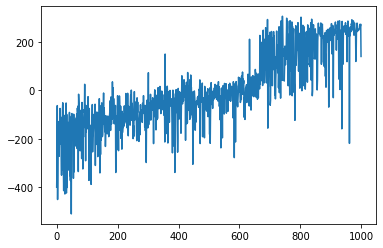

In [2]:
rewards = np.load('./LunarLander-v2_rewards.npy')
plt.plot(rewards)
plt.show()

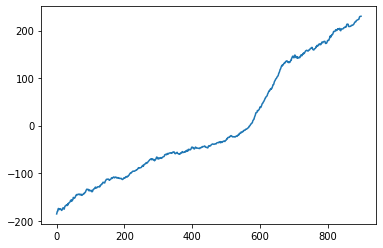

In [3]:
average = [np.mean(rewards[i-100:i]) for i in range(100, len(rewards))]
plt.plot(average)
plt.show()

### 2) watch it plays

In [4]:
env = gym.make(RAM_ENV_NAME)
agent = Agent(env.observation_space.shape[0], env.action_space.n, BATCH_SIZE, LEARNING_RATE, TAU, GAMMA, DEVICE)
agent.Q_local.load_state_dict(torch.load('./LunarLander-v2_weights.pth'))

rewards_log = []
eps = EPS_MIN
num_episode = 10
max_t = 1000
for i in range(1, num_episode+1):
    episodic_reward = 0
    done = False
    state = env.reset()
    t = 0

    while not done and t < max_t:

        env.render()
        t += 1
        action = agent.act(state, eps)
        next_state, reward, done, _ = env.step(action)
        state = next_state.copy()
        episodic_reward += reward

    rewards_log.append(episodic_reward)

rewards_log

[268.9079020030066,
 127.3833118533289,
 263.3524452359448,
 155.34388709178756,
 265.9542386907195,
 105.83257903720849,
 121.32475084882591,
 276.9034057296684,
 250.99299225209367,
 285.4588565885068]

In [5]:
env.close()